<a href="https://colab.research.google.com/github/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/blob/main/Proyecto_EntregaPlus_Comision61190_RodriguezCastilloLeonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentacion de Proyecto ENTREGA PLUS**

## **1.- Hipótesis.**
La zona geográfica donde se envían los pedidos influye en nuestros indicadores de:
* Puntualidad de Entrega de Pedidos
* Efectividad de Entrega de Pedidos

Con lo cual entendemos que sabiendo donde debemos entregar cada uo de ellos, podemos establecer una probabilidad de NO ENTREGA, que nos va a permitir tomar acciones para que cada pedido con baja probalidad de entrega, sea finalmente entregado en su primer visita.

## **2. - Objetivo y alcance.**
El Objetivo del proyecto es poder crear un modelo que pueda identificar para cada pedido, si el mismo se va a entregar o no en la primer visita que realice nuestro proveedor logístico.

# **Data Acquisition**

## **Metadata**

**1.- Descripción de los datos.**

El set de datos es acerca de pedidos de la empresa EPSILON S.A., los cuales hacen referencia a los detalles para la entrega de los mismos a nuestros clientes.

**2.- Detalles generales del dataset**
* Cantidad de Registros: 190151
* Volumen de Crecimiento Estimado Diario: 5000
* Datos del año 2024

**3.- Diccionario de datos.**

| Columna | Tipo de Dato |
|---------|--------------|
| Entrega |  int64 |
| Fecha Pedido | datetime64 |
| Distribuidor | category |
| Distribuidor Sigla | category |
| Tipo de Distribución Comercial | category |
| Codigo Postal | int64 |
| Id Provincia | int64 |
| Provincia | category |
| Localidad | category |
| Departamento |category |
| Aglomerado |category |
| Id Zona Logistica | int64 |
| Zona Logistica |category |
| Zona E-Commerce |category |
| Periodo |category |
| Año | int64 |
| Mes Sigla |category |
| Mes Nombre |category |
| Mes Numero | int64 |
| Trimestre Sigla |category |
| Trimestre Nombre |category |
| Trimestre Numero | int64 |
| Semestre | int64 |
| Año Semana |category |
| Dia Semana Sigla |category |
| Dia Semana Numero | int64 |
| Dia Semana Nombre |category |
| Hora Pedido | int64 |
| Visita 1 Fecha | datetime64[ns] |
| Visita 1 Hora | object |
| ID Visita 1 Motivo |category |
| Visita 1 Motivo |category |
| Dias Primer Visita | int64 |
| Flag Visita 1 Puntual |category |
| Estado Visita |category |
| Estado Distribución |category |
| Calidad de la Direccion |category |
| Cantidad de Pedidos | int64 |
| Visita 1 Puntual | int64 |
| Cant. Primera Visita | int64 |
| Cant. Vis. y Ent. 1ra Visita | int64 |
| Cantidad Celulares | int64 |
| Cantidad Accesorios | int64 |
| Peso Bruto | float64 |
| Valor Total en Pesos | float64 |
| Valor Total en Dolares | float64 |
| Provincia Sigla | object |
| Hora Visita | int64 |

## **Importacion de Dataset**

In [ ]:
#Instalación de Librerías
!pip install dataprep
!pip install chart_studio
!pip install mglearn
!pip install gapminder

#Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import missingno as msno

import requests
#La librería requests en Python es una herramienta poderosa y popular que se utiliza para realizar solicitudes HTTP de manera sencilla
#y eficiente. Permite interactuar con páginas web, APIs RESTful, y otros servicios basados en HTTP
import json

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
#La librería warnings en Python se utiliza para gestionar y controlar mensajes de advertencia (warnings) durante la ejecución de un programa.
#A diferencia de los errores, que detienen la ejecución del programa, los warnings son mensajes informativos que indican situaciones potencialmente
#problemáticas, pero permiten que el programa continúe ejecutándose

import mglearn
#La librería mglearn (abreviatura de mglearn) es una herramienta complementaria que facilita el aprendizaje y la enseñanza de Machine Learning en Python.
#Está diseñada principalmente para ilustrar conceptos básicos de aprendizaje automático de manera visual e intuitiva

import graphviz
#La librería graphviz en Python se utiliza para trabajar con Graphviz, una herramienta de visualización gráfica que permite crear y
#representar grafos dirigidos y no dirigidos. Es especialmente útil para crear diagramas jerárquicos, flujos de trabajo, árboles de decisión,
#redes de dependencias y otras estructuras gráficas

import folium  #needed for interactive map
from folium.plugins import HeatMap
#La librería folium en Python se utiliza para crear mapas interactivos de manera sencilla y visualmente atractiva. Es una herramienta ideal para trabajar
#con datos geoespaciales y visualizar información geográfica superpuesta en mapas

from IPython.display import display
from IPython.display import HTML
#La librería IPython.display de Python es un módulo utilizado principalmente en entornos interactivos como Jupyter Notebooks. Su función es proporcionar
#herramientas para mostrar salidas de una manera más rica y flexible, como imágenes, gráficos, HTML, audio y más. Esto mejora la experiencia de visualización
#y presentación de resultados
#La librería display en Python es parte del paquete IPython.display, que proporciona funciones para mostrar objetos de manera interactiva y enriquecida
#dentro de entornos como Jupyter Notebook o Google Colab.
#Permite mostrar no solo texto, sino también imágenes, gráficos, HTML, Markdown, audio, video y otros tipos de datos de forma estructurada
#y visualmente atractiva
#La función HTML se usa para mostrar contenido HTML directamente en el cuaderno de Jupyter. Esto es especialmente útil para integrar código HTML en tus
#celdas y ver cómo se presenta sin tener que crear archivos externos.

from bokeh.io import show, output_file
#La librería bokeh.io es parte del ecosistema de Bokeh en Python, una herramienta para crear visualizaciones interactivas de alta calidad que se pueden
#integrar fácilmente en aplicaciones web o presentaciones.
#Bokeh es especialmente útil cuando se quiere trabajar con gráficos dinámicos y visualizaciones interactivas para la web, como gráficos de líneas, barras,
#dispersión, mapas, y más, todo en tiempo real.
#Las funciones show y output_file provienen de la librería Bokeh, que se utiliza para crear visualizaciones interactivas en Python. Estas funciones son
#clave para mostrar los gráficos creados con Bokeh, ya sea en un navegador web o como parte de un archivo HTML

from bokeh.plotting import figure
#La librería bokeh.plotting de Bokeh en Python se utiliza para crear visualizaciones interactivas y dinámicas en el navegador web. Permite generar gráficos
#y visualizaciones atractivas que los usuarios pueden explorar de manera interactiva, como hacer zoom, mover, o seleccionar puntos en los gráficos.
#Bokeh es especialmente útil para proyectos que requieren visualización web o dashboard interactivo.
#La función figure de la librería Bokeh en Python es el núcleo para crear gráficos interactivos y personalizados. Bokeh es una biblioteca poderosa para
#la visualización de datos, y la función figure actúa como un lienzo donde puedes agregar elementos visuales, como gráficos de líneas, barras, puntos, etc.

from bokeh.models import DatetimeTickFormatter
#bokeh.models contiene modelos que proporcionan herramientas, widgets y componentes que puedes utilizar para personalizar y mejorar las visualizaciones
#en Bokeh.
#Estos modelos permiten añadir interactividad, controlar las propiedades visuales de los elementos gráficos, y configurar la forma en que los gráficos
#responden a las acciones del usuario.

from mlxtend.plotting import plot_decision_regions
#La librería mlxtend.plotting es parte de mlxtend (machine learning extensions), una biblioteca de Python que proporciona herramientas adicionales para el
#análisis y visualización de datos, especialmente orientadas a machine learning y análisis exploratorio. La sublibrería mlxtend.plotting está diseñada para
#facilitar la visualización de resultados y modelos de aprendizaje automático, creando gráficos que son útiles tanto para la interpretación de modelos como
#para la presentación de resultados

from dataprep.eda import create_report
#La librería dataprep.eda es parte de la biblioteca dataprep en Python y está diseñada para facilitar el proceso de exploración y análisis de datos. Es una
#herramienta muy útil para realizar un análisis exploratorio de datos (EDA) de manera rápida y eficiente, sin necesidad de escribir mucho código.
#dataprep.eda automatiza muchas tareas comunes en la exploración de datos y te permite obtener información valiosa sobre tu conjunto de datos con poco esfuerzo

from gapminder import gapminder
#Gapminder es una biblioteca utilizada para trabajar con el conjunto de datos Gapminder, que contiene información socioeconómica y de salud
#de varios países a lo largo del tiempo. Este conjunto de datos es muy popular en análisis de datos, visualización y aprendizaje de estadísticas.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
label_encoder = LabelEncoder()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_blobs

In [ ]:
#Configuración de Enlaces de los Datasets del Proyecto en Github
URL1 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_1_Pedidos_61190.xlsx'
URL2 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_2_Pedidos_61190.xlsx'
URL3 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_3_Pedidos_61190.xlsx'

In [ ]:
#Cremos Dataframes con los enlaces anteriores
#A todos los campos los importo como String, para luego convertir particularmente los que no lo sean
df_2024_Sem_1 = pd.read_excel(URL1, dtype='str')
df_2024_Sem_2 = pd.read_excel(URL2, dtype='str')
df_2024_Sem_3 = pd.read_excel(URL3, dtype='str')

In [ ]:
#Validamos que todas las columnas del primer dataframe sea String
df_2024_Sem_1.info()

In [ ]:
#Validamos que todas las columnas del segundo dataframe sea String
df_2024_Sem_2.info()

In [ ]:
#Validamos que todas las columnas del tercer dataframe sea String
df_2024_Sem_3.info()

In [ ]:
#Creamos Dataframe Auxiliar con datos de Provicias
URL3 = 'https://infra.datos.gob.ar/georef/provincias.json'
response = requests.get(URL3)
datos_json = json.loads(response.text)
df_prov = pd.DataFrame.from_dict(datos_json['provincias'])

#Renombramos la columna "Id" a "Id Provincia"
df_prov = df_prov.rename(columns={'id': 'Id Provincia'})

#Agregamos la columna "Sigla Provincia" y le aportamos un valor a cada una
df_prov['Provincia Sigla']=""
df_prov.loc[df_prov['Id Provincia'] == '02', 'Provincia Sigla'] = 'CABA'
df_prov.loc[df_prov['Id Provincia'] == '06', 'Provincia Sigla'] = 'BSAS'
df_prov.loc[df_prov['Id Provincia'] == '10', 'Provincia Sigla'] = 'CATA'
df_prov.loc[df_prov['Id Provincia'] == '14', 'Provincia Sigla'] = 'CORD'
df_prov.loc[df_prov['Id Provincia'] == '18', 'Provincia Sigla'] = 'CTES'
df_prov.loc[df_prov['Id Provincia'] == '22', 'Provincia Sigla'] = 'CHAC'
df_prov.loc[df_prov['Id Provincia'] == '26', 'Provincia Sigla'] = 'CHUB'
df_prov.loc[df_prov['Id Provincia'] == '30', 'Provincia Sigla'] = 'ERIO'
df_prov.loc[df_prov['Id Provincia'] == '34', 'Provincia Sigla'] = 'FORM'
df_prov.loc[df_prov['Id Provincia'] == '38', 'Provincia Sigla'] = 'JUJU'
df_prov.loc[df_prov['Id Provincia'] == '42', 'Provincia Sigla'] = 'PAMP'
df_prov.loc[df_prov['Id Provincia'] == '46', 'Provincia Sigla'] = 'RIOJ'
df_prov.loc[df_prov['Id Provincia'] == '50', 'Provincia Sigla'] = 'MEND'
df_prov.loc[df_prov['Id Provincia'] == '54', 'Provincia Sigla'] = 'MISI'
df_prov.loc[df_prov['Id Provincia'] == '58', 'Provincia Sigla'] = 'NEUQ'
df_prov.loc[df_prov['Id Provincia'] == '62', 'Provincia Sigla'] = 'RNEG'
df_prov.loc[df_prov['Id Provincia'] == '66', 'Provincia Sigla'] = 'SALT'
df_prov.loc[df_prov['Id Provincia'] == '70', 'Provincia Sigla'] = 'SJUA'
df_prov.loc[df_prov['Id Provincia'] == '74', 'Provincia Sigla'] = 'SLUI'
df_prov.loc[df_prov['Id Provincia'] == '78', 'Provincia Sigla'] = 'SCRU'
df_prov.loc[df_prov['Id Provincia'] == '82', 'Provincia Sigla'] = 'SAFE'
df_prov.loc[df_prov['Id Provincia'] == '86', 'Provincia Sigla'] = 'SEST'
df_prov.loc[df_prov['Id Provincia'] == '90', 'Provincia Sigla'] = 'TUCU'
df_prov.loc[df_prov['Id Provincia'] == '94', 'Provincia Sigla'] = 'TFUE'

#Mostramos resultado
df_prov.head(5)

# **Data Wrangling**

In [ ]:
#Concatenamos los 3 Dataframes del año 2024
frames = [df_2024_Sem_1, df_2024_Sem_2, df_2024_Sem_3]
df_concat = pd.concat(frames)

In [ ]:
#Hacemos Merge entre el Dataframe principal y el de provicias para agregar la columna Sigla de la provincia
df = pd.merge(df_concat, df_prov, left_on = "Id Provincia", right_on = "Id Provincia", how = 'left')
df.shape

In [ ]:
#Buscamos registros NaN en los campos geográficos para que quede constancia de los mismos
df_geo = df[['Entrega','Codigo Postal','Provincia','Provincia Sigla']]
df_geo.loc[df_geo['Provincia Sigla'].isna()]

In [ ]:
#Borramos registros NaN en todo lo referente a los datos geográficos del Dataframe principal
df = df.dropna(subset=['Provincia Sigla'])
df.shape

In [ ]:
#Cambiamos el tipo de datos de las columnas que corresponda
df = df.astype({
    'Entrega': 'int64',
    'Distribuidor': 'category',
    'Distribuidor Sigla': 'category',
    'Centro': 'category',
    'Centro Sigla': 'category',
    'Centro Tipo': 'category',
    'Tipo de Distribución Comercial': 'category',
    'Codigo Postal': 'int64',
    'Id Provincia': 'int64',
    'Provincia': 'category',
    'Localidad': 'category',
    'Departamento': 'category',
    'Aglomerado': 'category',
    'Id Zona Logistica': 'int64',
    'Zona Logistica': 'category',
    'Zona E-Commerce': 'category',
    'Periodo': 'category',
    'Año': 'int64',
    'Mes Sigla': 'category',
    'Mes Nombre': 'category',
    'Mes Numero': 'int64',
    'Trimestre Sigla': 'category',
    'Trimestre Nombre': 'category',
    'Trimestre Numero': 'int64',
    'Semestre': 'int64',
    'Año Semana': 'category',
    'Dia Semana Sigla': 'category',
    'Dia Semana Nombre': 'category',
    'Dia Semana Numero': 'int64',
    'Hora': 'int64',
    'ID Visita 1 Motivo': 'category',
    'Visita 1 Motivo': 'category',
    'Dias Primer Visita': 'int64',
    'Flag Visita 1 Puntual': 'category',
    'Estado Visita': 'category',
    'Estado Distribución': 'category',
    'Calidad de la Direccion': 'category',
    'Cantidad de Pedidos': 'int64',
    'Visita 1 Puntual': 'int64',
    'Cant. Primera Visita': 'int64',
    'Cant. Vis. y Ent. 1ra Visita': 'int64',
    'Cantidad Celulares': 'int64',
    'Cantidad Tarjetas SIMs': 'int64',
    'Cantidad Accesorios': 'int64',
    'Cantidad Accesorios IOT': 'int64',
    'Peso Bruto': 'float64',
    'Costo Total de Materiales': 'float64',
    'Valor Total USD': 'float64',
})

df['Fecha Pedido'] = pd.to_datetime(df['Fecha Pedido'])
df['Visita 1 Fecha'] = pd.to_datetime(df['Visita 1 Fecha'])

In [ ]:
#Cambiamos nombres de las columnas que necesiten ser más claras en lo descriptivo
df = df.rename(columns={'Hora': 'Hora Pedido'})
df = df.rename(columns={'Costo Total de Materiales': 'Valor Total en Pesos'})
df = df.rename(columns={'Valor Total USD': 'Valor Total en Dolares'})

In [ ]:
#Creamos el campo "Hora Visita" en formato de 2 dígitos (los 2 de la izquierda del campo "Visita 1 Hora")
df['Hora Visita'] = df['Visita 1 Hora'].str.slice(0, 2)

#Cambiamos a Nan los valores Numeral ("#") del campo "Hora Visita"
df.loc[df['Hora Visita'] == '#', 'Hora Visita'] = np.nan

#Cambiamos el tipo de datos de esta nueva columna a "Int64"
df['Hora Visita'] = df['Hora Visita'].astype('Int64')

#Validamos que haya quedado correcto el cambio
df[['Entrega','Hora Visita']]

In [ ]:
#Borramos las columnas que no aportan valor al Dataframe
df = df.drop(['Canal', 'Subcanal', 'Centro', 'Centro Sigla', 'Centro Tipo', 'Puesto de Expedicion', 'Visita 1 Trackeo', 'Visita 1 Transporte', 'Días contrato primera visita'], axis=1)
df = df.drop(['Cantidad Tarjetas SIMs', 'Cantidad Accesorios IOT', 'nombre', 'nombre_completo', 'fuente', 'iso_id', 'iso_nombre'], axis=1)
df = df.drop(['Latitud Provincia', 'Longitud Provincia', 'Latitud Departamento', 'Longitud Departamento', 'Latitud Localidad', 'Longitud Localidad'], axis=1)
df = df.drop(['centroide', 'categoria'], axis=1)

In [ ]:
#Obtenemos algunas estadísticas del Dataset
df.describe().round().T

,PRECIO,PRECIO_TOTAL,FECHA_INGRESO
count,65533.000000,6.493600e+04,65533
mean,351.190820,9.738388e+02,2020-11-21 21:52:14.075045888
min,1.000000,0.000000e+00,2020-07-16 04:00:00
25%,57.000000,7.900000e+01,2020-10-22 00:00:00
50%,154.000000,2.460000e+02,2020-11-27 00:00:00
75%,313.000000,7.440000e+02,2021-01-03 12:00:00
max,247005.000000,1.640299e+06,2021-02-09 12:00:00
std,3573.772969,1.634685e+04,NaN


## **Método describe()**
En línea general se observan datos acordes sobre todo en los indicadores. Pero debemos revisar lo siguiente:
* Peso Bruto tiene un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero
* Peso Bruto tiene un peso máximo irreal. Debemos detectar y tratar esos registros
* Valor Total en Pesos y Valor Total en Dolares tienen un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero

Esto nos permite concluir que tenemos un muy buen dataset, con una alta calidad de datos

In [ ]:
#Tratamiento de Peso Bruto Mayor a 200 KG
limite_peso_maximo = 200
media_peso = df.loc[df['Peso Bruto'] < limite_peso_maximo, 'Peso Bruto'].mean()
df.loc[df['Peso Bruto'] > limite_peso_maximo, 'Peso Bruto'] = media_peso

In [ ]:
#Tratamiento de Peso Bruto = 0 (cero)
df.loc[df['Peso Bruto'] == 0, 'Peso Bruto'] = media_peso

In [ ]:
#Tratamiento de Valor Total en $ (Pesos Argentinos)
media_pesos_ar = df.loc[df['Valor Total en Pesos'] > 0, 'Valor Total en Pesos'].mean()
media_pesos_ar
df.loc[df['Valor Total en Pesos'] == 0, 'Valor Total en Pesos'] = media_pesos_ar

In [ ]:
#Tratamiento de Valor Total en u$s (Dolares)
media_dolares = df.loc[df['Valor Total en Dolares'] > 0, 'Valor Total en Dolares'].mean()
df.loc[df['Valor Total en Dolares'] == 0, 'Valor Total en Dolares'] = media_dolares

## **Validacion Final de Estructura de dataset**

In [ ]:
#Obtenemos meta información de la estructura del DataFrame
df.shape

In [ ]:
#Mostramos el Final del Dataset Principal
df.tail(5)

In [ ]:
#Mostramos el Comienzo del Dataset Principal
df.head(5)

,SUPERMERCADOS,CATEGORIA,DESCRIPCION,TIPO_ENVASE,PRECIO,PRECIO_TOTAL,UNIDADES,FECHA_INGRESO
0,mercadona-es,postres_y_yogures_yogures_liquidos,Bebida láctea sin lactosa de fresa Hacendado,Pack-4,14.0,219.0,kg,2020-12-23 00:00:00
1,mercadona-es,bodega_licores,Ginebra 15 botanicals Blumara,Botella,1075.0,1536.0,L,2020-11-06 12:00:00
2,mercadona-es,charcuteria_y_quesos_queso_untable_y_fresco,Queso fresco batido desnatado Hacendado 0% mat...,Tarrina,109.0,218.0,kg,2020-09-23 16:06:00
3,carrefour-es,la_despensa_yogures_y_postres_yogures_desnatados,Yogur bífidus desnatado con lima y limón Danon...,Pack 4x120 G.,208.0,433.0,kg,2020-10-10 00:00:00
4,carrefour-es,la_despensa_helados_bombon,Helado After Dinner Magnum sin gluten 10 ud.,10 Ud.,46.0,46.0,ud,2020-10-15 00:00:00


In [ ]:
#Validamos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SUPERMERCADOS  65535 non-null  object        
 1   CATEGORIA      65535 non-null  object        
 2   DESCRIPCION    65535 non-null  object        
 3   TIPO_ENVASE    33314 non-null  object        
 4   PRECIO         65533 non-null  float64       
 5   PRECIO_TOTAL   64936 non-null  float64       
 6   UNIDADES       64936 non-null  object        
 7   FECHA_INGRESO  65533 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.0+ MB


In [ ]:
#Antes de analizar los principales estadísticos, verificamos si nuestra estructura de datos es un dataframe
type(df)

In [ ]:
#Validación Estadisticas Preliminares
df.describe().round().T

#Se han corregido los datos tratados

In [ ]:
# Contamos la cantidad de numeros 0 (ceros) por columnas
nun_missing = (df == 0).sum()
print(nun_missing)

# **Mejora de Dataset y Exploracion de datos**

* Enriquecer el dataset No estoy cumpliendo con la cantidad de datos a presentar

* Enriquecer las columnas del dataset No estoy cumpliendo con la consigna de tener mas datos numericos.

* Capturar distintos dataset y enriquecer el modelo con un mega dataset

* Validar la presencia de valores perdidos y sugerir alguna solución.

* Iniciar el proceso de limpieza y exploración de datos.

## **Cuenta de Registros con Valor = 0**
Se observan muy pocos columnas con datos con valor 0 (cero). Y las columnas que tienen 0 (cero) dentro de sus valores, es coherente que así sea.

In [ ]:
# Contamos la cantidad de Numerales (#) por columnas, ya que este caracter es el que utiliza el sistema de origen para representar los vaores en NULO
nun_missing = (df == "#").sum()
print(nun_missing)

Entrega                              0
Fecha Pedido                         0
Distribuidor                         0
Distribuidor Sigla                   0
Tipo de Distribución Comercial       0
Codigo Postal                        0
Id Provincia                         0
Provincia                            0
Localidad                            0
Departamento                      1712
Aglomerado                        8848
Id Zona Logistica                    0
Zona Logistica                       0
Zona E-Commerce                   1254
Periodo                              0
Año                                  0
Mes Sigla                            0
Mes Nombre                           0
Mes Numero                           0
Trimestre Sigla                      0
Trimestre Nombre                     0
Trimestre Numero                     0
Semestre                             0
Año Semana                           0
Dia Semana Sigla                     0
Dia Semana Numero        

## **Cuenta de Registros con Valor = "#"**
El Numeral (#), en el sistema de origen de los datos, representa aquellos valores nulos.

Se observan muy pocos columnas con datos con valor Numeral (#). Y las columnas que tienen Numeral (#) dentro de sus valores (Departamento, Aglomerado y Zona E-Commerce), tienen muy pocos registros en esa situación.

Los campos referentes a la Visita 1 con # (Numeral), es coherente que esté en esa situación ya que son casos aún no visitados y posibemente ya devueltos al Centro que los preparó.

<Axes: >

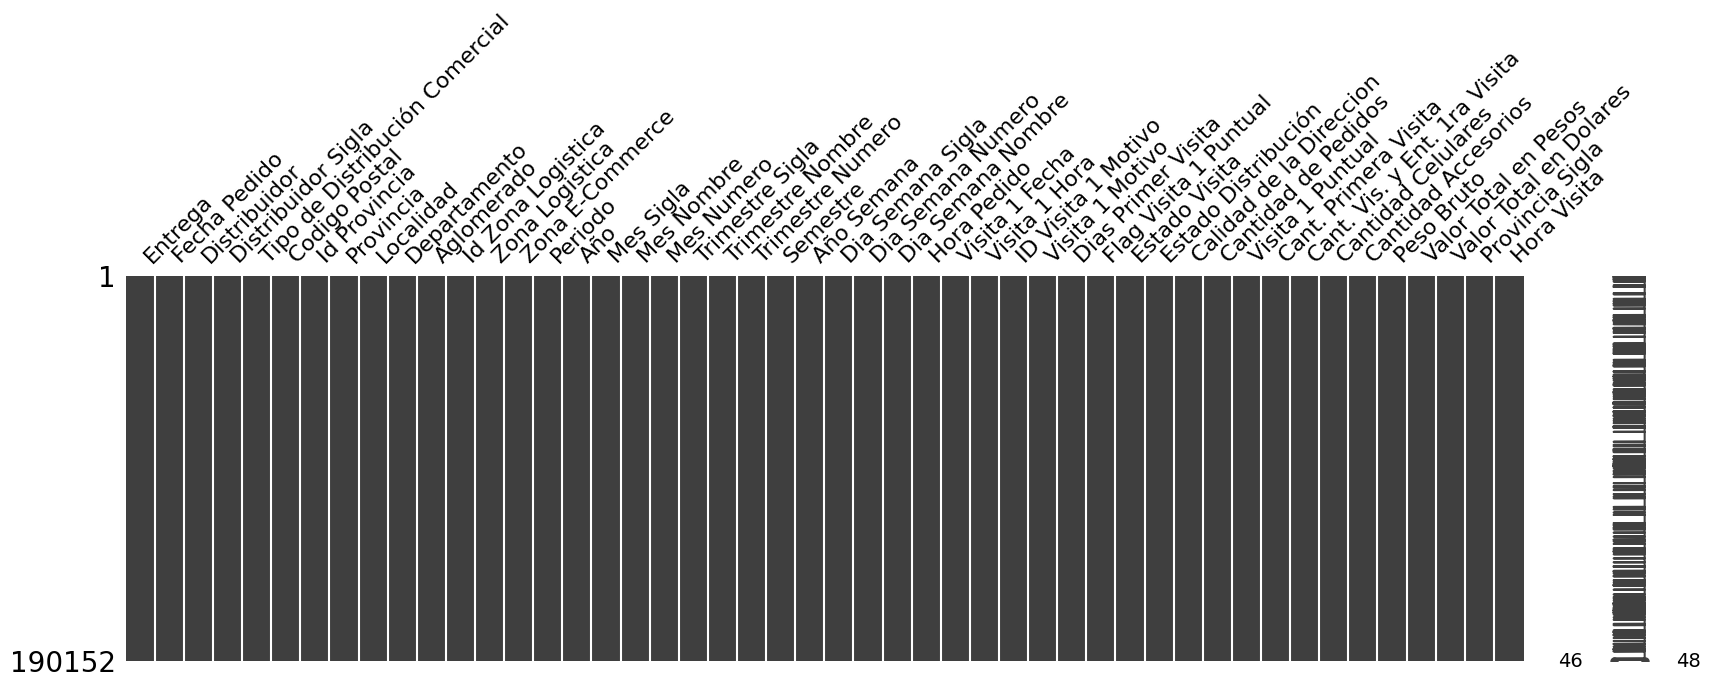

In [ ]:
#Graficamos los nulos por columna
msno.matrix(df, figsize = (20,5))

In [ ]:
#Mostramos resumen de Vaores Nulos
df.isnull().sum()

,0
Entrega,0
Fecha Pedido,0
Distribuidor,0
Distribuidor Sigla,0
Tipo de Distribución Comercial,0
Codigo Postal,0
Id Provincia,0
Provincia,0
Localidad,0
Departamento,0


##**Exploración de Datos Nulos**
Se observa una casi perfecta integridad de datos ya que no existen valores NULOS en el dataset. Come se comentó anteriormente, solo lo referido a la Visita 1 tiene nulos y eso está bien, ya que son casos aún no visitados. Incluso, puede ser pedidos ya devueltos a su centro de origen

##**Control de Duplicados**
El dataset asegura al 100% que no hay valores duplicados. El proceso interno de generación de esta información no permite que un mismo número de Entrega, pueda estar 2 o más veces dentro de la tabla, ya que ese dato es la clave de la misma